In [1]:
import numpy as np
import matplotlib.pyplot as plt

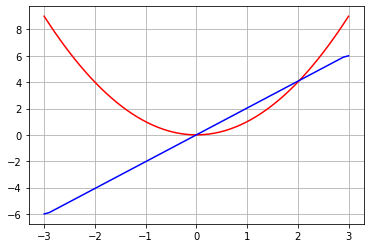

In [2]:
#jakobian funkcji jednej zmiennej
start = -3
stop = 3
step = 0.1
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
f = x**2 #zdefiniowanie funkcji f
 
J = np.gradient(f, step) #oblicznie jakobianu funkjci jednej zmiennej
det_J = J #wyznacznik jakobianu to jakobian

#jakobian jest skalarem, tablica jednowymiarowa

plt.figure()#przedstawienie wykresow
plt.plot(x, f, 'r-') #wykres funkcji f
plt.plot(x, J, 'b-') #wykres jakobianu (pochodnej)
plt.grid(True)
plt.show()

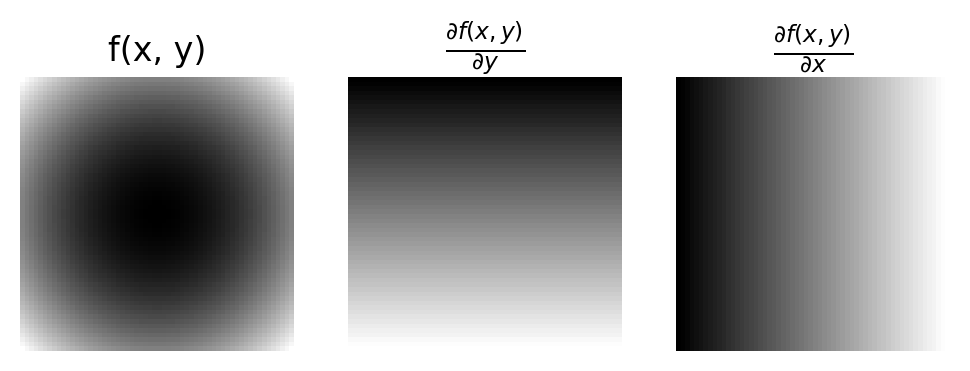

In [5]:
#jakobian funcji dwoch zmiennych
start = -3
stop = 3
step = 0.1
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
y = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej y
xs, ys = np.meshgrid(x, y) #wygenerowanie siatek na osiach x i y
f = xs**2 + ys**2 #wygenerwowanie wartosci fukcji f
J = np.gradient(f, step) #obliczenie jakobianu funkcji f

#jakobian jest wektorem, naszym gradientem, tablica 2 wymiarowa
#z wektora nie policzymy wyznacznika

rows = 1 
cols = 3

plt.figure(dpi=200) #przedstawienie wykresów
plt.subplot(rows, cols, 1)
plt.imshow(f, cmap='gray') #wykres funkcji f
plt.title('f(x, y)')
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(J[0], cmap='gray')#wykres jakobianu (pochodnej) po y
plt.title(r'$\frac{\partial f(x, y)}{\partial y}$')
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(J[1], cmap='gray')#wykres jakobianu (pochodnej) po x
plt.title(r'$\frac{\partial f(x, y)}{\partial x}$')
plt.axis('off')
plt.show()


(2, 2, 60, 60)
(60, 60, 2, 2)
Det shape:  (60, 60)


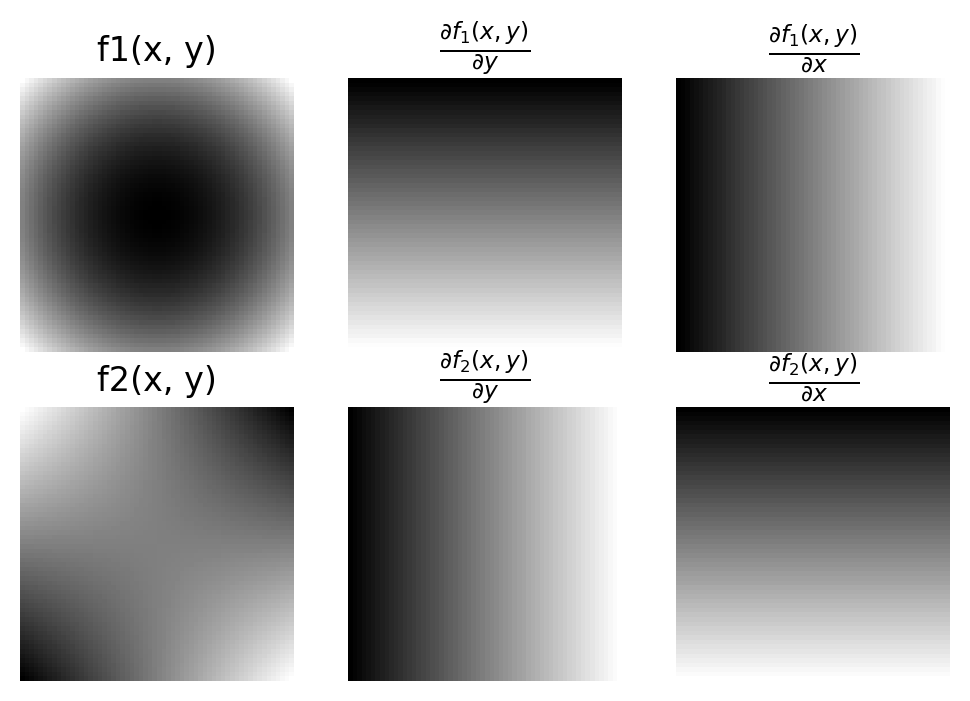

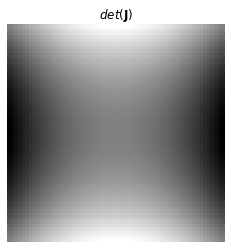

In [17]:
#jakobian jako macierz
start = -3
stop = 3
step = 0.1
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
y = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej y
xs, ys = np.meshgrid(x, y) #wygenerowanie siatek na osiach x i y
f1 = xs**2 + ys**2 #zdefiniowanie funkcji f1
f2 = xs*ys #zdefiniowanie funkcji f2
f = np.array([f1, f2]) #zbiore wartosci obu fumkcji
J1 = np.gradient(f1, step) #jakobian dla funkcji f1
J2 = np.gradient(f2, step) #jakobian dla funkcji f2
J = np.array([J1, J2]) #macierz jakobianow

print(J.shape) #rozmiar macierzy
# (2, 2, 60, 60) - dla każego koordytnatu x (60) i y (60) mamy macierz 2x2, bedaca jakobianem
# 2 - jakobian policzony dla x i y dla f1
# 2 - jakobian policzony dla x i y dla f2
# 60 - tablica wartosci f1
# 60 - tablica wartości f2

# det_J = np.linalg.det(J)
J = J.swapaxes(0, 2).swapaxes(1, 3) #musimy zmienic nasza mcierz, bo funkcja do liczenia wyznacznika zaklada ze macierz
#z ktorej liczony jst wyznacznik znajaduje sie na ostatnich dwoch wymiarach macierzy
print(J.shape) 
det_J = np.linalg.det(J) #obliczenie tablicy wyznaczników macierzy 2x2
print("Det shape: ", det_J.shape)  

rows = 2
cols = 3

plt.figure(dpi=200) #przedstawienie wykresów

plt.subplot(rows, cols, 1)
plt.imshow(f1, cmap='gray') #wykres funkcji f1
plt.title('f1(x, y)')
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(J1[0], cmap='gray') #wykres jakobianu (pochodnej) po y funkcji f1
plt.title(r'$\frac{\partial f_1(x, y)}{\partial y}$')
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(J1[1], cmap='gray') #wykres jakobianu (pochodnej) po x funkcji f1
plt.title(r'$\frac{\partial f_1(x, y)}{\partial x}$')
plt.axis('off')

plt.subplot(rows, cols, 4)
plt.imshow(f2, cmap='gray')
plt.title('f2(x, y)') #wykres funkcji f2
plt.axis('off')
plt.subplot(rows, cols, 5)
plt.imshow(J2[0], cmap='gray') #wykres jakobianu (pochodnej) po y funkcji f2
plt.title(r'$\frac{\partial f_2(x, y)}{\partial y}$')
plt.axis('off')
plt.subplot(rows, cols, 6)
plt.imshow(J2[1], cmap='gray') #wykres jakobianu (pochodnej) po x funkcji f2
plt.title(r'$\frac{\partial f_2(x, y)}{\partial x}$')
plt.axis('off')

plt.figure()
plt.imshow(det_J, cmap='gray') #wykres wyznacznika jakobianu obu funkcji f1 i f2
plt.title(r'$det(\mathbf{J})$')
plt.axis('off')

plt.show()

#jakobian pokazuje zmiane objectosci

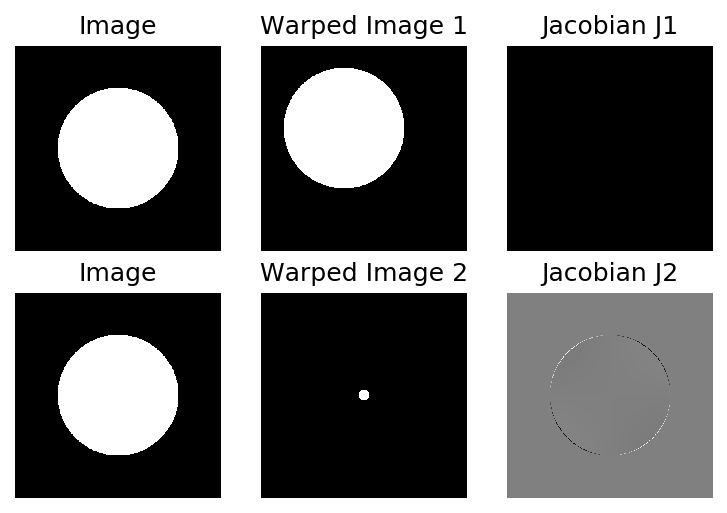

In [8]:
from scipy import ndimage as nd

y_size, x_size = 512, 512 #rozmiar danych
grid_x, grid_y = np.meshgrid(np.arange(x_size), np.arange(y_size)) #wygenerowanie dziedziny obrazu 2 wymiarowego
x0, y0, r = 256, 256, 150 #okreslenie parametrow koła
image = ((grid_x - x0)**2 + (grid_y - y0)**2 < r**2).astype(np.float32) #nasz obraz opisany rownaniem okregu (dane float32)

#transformacja kola w przestrzeni (translacja - przesuniecie)
u_x_1, u_y_1 = 50*np.ones(image.shape), 50*np.ones(image.shape) #wygenerowanie pol przemieszczen
#translacja to przemieszczeni 50 jednstek w gore i 50 jednostek w lewo
warped_image_1 = nd.map_coordinates(image, [grid_y + u_y_1, grid_x + u_x_1]) #uporzadkowana interpolacja jednowymiarowa
#z jednorodnymi odstepami miedzy punktami (domyslenie interpolacja splinowa)

Jx1 = np.gradient(grid_x + u_x_1) #obliczenie jakobianu wzgledem x 
Jy1 = np.gradient(grid_y + u_y_1) #obliczenie jakobianu wzgledem y
J1 = np.array([Jx1, Jy1]) #jakobian jako macierz Jx1 i Jx2
J1 = J1.swapaxes(0, 2).swapaxes(1, 3) #zamiannna osi w macierzy jakobianu
det_J1 = np.linalg.det(J1) #obliczenie wyznacznka jakobianu

#transformacja kola w przestrzeni (niesztywna - zmniejszenie koła)
#Im cos bylo dalej okregu tym bardziej zostalo przysuniete do srodka okregu
u_x_2, u_y_2 = np.zeros(image.shape), np.zeros(image.shape) #wygenerowanie zer
u_x_2 = (grid_x - x0)**2 #odleglosc wzdluz x 
u_y_2 = (grid_y - y0)**2 #odleglosc wzdluz y
u_x_2[(grid_x - x0)**2 + (grid_y - y0)**2 > r**2] = 0 #przypisanie zera do wszystkich wartosci poza okregiem dla x
u_y_2[(grid_x - x0)**2 + (grid_y - y0)**2 > r**2] = 0 #przypisanie zera do wszystkich wartosci poza okregiem dla y

warped_image_2 = nd.map_coordinates(image, [grid_y + u_y_2, grid_x + u_x_2]) #uporzadkowana interpolacja jednowymiarowa
#z jednorodnymi odstepami miedzy punktami (domyslenie interpolacja splinowa)

Jx2 = np.gradient(grid_x + u_x_2) #obliczenie jakobianu wzgledem x 
Jy2 = np.gradient(grid_y + u_y_2) #obliczenie jakobianu wzgledem y
J2 = np.array([Jx2, Jy2]) #jakobian jako macierz Jx1 i Jx2
J2 = J2.swapaxes(0, 2).swapaxes(1, 3) #zamiannna osi w macierzy jakobianu
det_J2 = np.linalg.det(J2) #obliczenie wyznacznka jakobianu

rows = 2
cols = 3

plt.figure(dpi=150) #przedstawienie wykresów

plt.subplot(rows, cols, 1)
plt.imshow(image, cmap='gray') #wykres wygenerowanego koła
plt.title("Image")
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(warped_image_1, cmap='gray') #wykres przesunietego koła
plt.title("Warped Image 1")
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(det_J1, cmap='gray') #wykres wznacznika jakobianu przesunietego koła
plt.title("Jacobian J1")
plt.axis('off')

plt.subplot(rows, cols, 4)
plt.imshow(image, cmap='gray') #wykres wygenerowanego koła
plt.title("Image")
plt.axis('off')
plt.subplot(rows, cols, 5)
plt.imshow(warped_image_2, cmap='gray') #wykres pomniejsznego koła
plt.title("Warped Image 2")
plt.axis('off')
plt.subplot(rows, cols, 6)
plt.imshow(det_J2, cmap='gray') #wykres wyznacznika jakobianu pomniejszonego koła
plt.title("Jacobian J2")
plt.axis('off')

plt.show()


#jakobian dla pierwszej transformacji nie jest widoczny, poniewaz nie zmienia ona pola (objetosci)
#jakobian dla drugiej transformacji obrazuje zmiane pola (objetosci) powstala podczas drugiej transformacji

#zastosowanie - analiza obrazow tomografii komputerowej nowotworow, majac transformacje w czasie mozemy okreslic jaki
#jest przebieg tej choroby (rosnie, maleje, jak zmienia sie jego objetosc)

#zastosowanie  - jakobian pokazuje czy dana transformacja jest odrwacalna, jezeli wyznacznik jakobianu jest rowny zero
#lub mniejszy od zera to dane przeksztalcenie jest nieodwracalne, a jezeli wiekszy od zera to jest odwracalny


[[-1207.87868963 -1128.96959952 -1013.49153565 ... -1013.49153565
  -1128.96959952 -1207.87868963]
 [-1128.96959952 -1037.71011052  -913.46596371 ...  -913.46596371
  -1037.71011052 -1128.96959952]
 [-1013.49153565  -913.46596371  -785.06557006 ...  -785.06557006
   -913.46596371 -1013.49153565]
 ...
 [-1013.49153565  -913.46596371  -785.06557006 ...  -785.06557006
   -913.46596371 -1013.49153565]
 [-1128.96959952 -1037.71011052  -913.46596371 ...  -913.46596371
  -1037.71011052 -1128.96959952]
 [-1207.87868963 -1128.96959952 -1013.49153565 ... -1013.49153565
  -1128.96959952 -1207.87868963]]


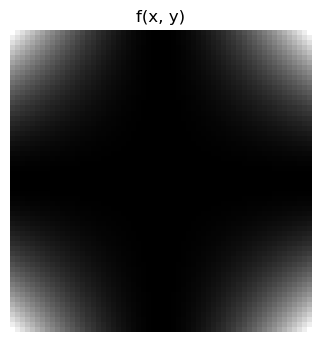

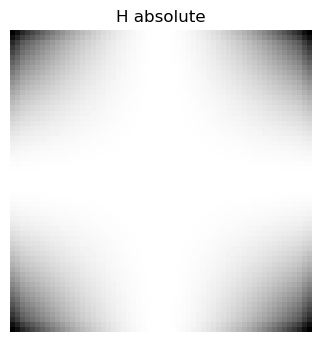

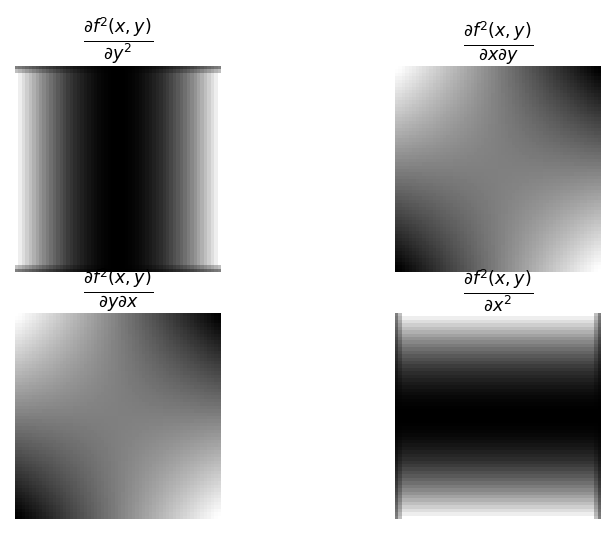

In [14]:
#hessian - macierz drugich pochodnych
"""
f(x,y)
J = [df(x, y)/dx , df(x, y)/dy]
H = [
    ddf(x, y)/dx^2, ddf(x, y)/dxdy
    ddf(x, y)/dydx , ddf(x, y)/dy^2
    ]
gdy jakobian staje sie macierza, hessian staje sie tensorem (3-wymiarowy)
wielkosc hessianu rosnie z kwadratem liczby zmiennych
"""

start = -3
stop = 3
step = 0.1
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
y = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej y
xs, ys = np.meshgrid(x, y) #wygenerowanie siatek na osiach x i y
f = xs**2*ys**2 #zdefiniowanie funkcji f dwoch zmiennych
J = np.gradient(f, step) #obliczenie jakobianu funkcji f
H1, H2 = np.gradient(J[0], step) #obliczenie 2 wartosci hessianu dla jakobianu osi y 
H3, H4 = np.gradient(J[1], step) #obliczenie 2 wartosci hessinnu dla jakobianu osi x

#hessian wymaga aby funkcja byla podwojnie rozniczkowalna, interpolacja hessianu musi byc rzedu 2 lub wyzej (np.spline)

H_abs = H1 * H4 - H2**2
print(H_abs)

plt.figure(dpi=100)
plt.imshow(f, cmap='gray') #przedstawienie wykres funkji f
plt.title('f(x, y)')
plt.axis('off')

plt.figure(dpi=100)
plt.imshow(H_abs, cmap='gray') #przedstawienie wykresu wartosci bezwglednych hessianu
plt.title('H absolute')
plt.axis('off')



rows = 2
cols = 2

plt.figure(dpi=150) #przedstawienie wykresow
plt.subplot(rows, cols, 1)
plt.imshow(H1, cmap='gray') #wykres hessinu (2 pochodnej) dla y^2
plt.title(r'$\frac{\partial f^2(x, y)}{\partial y^2}$')
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(H2, cmap='gray') #wykres hessinu (2 pochodnej) dla x a potem y
plt.title(r'$\frac{\partial f^2(x, y)}{\partial x \partial y}$')
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(H3, cmap='gray') #wykres hessinu (2 pochodnej) dla y a potem x
plt.title(r'$\frac{\partial f^2(x, y)}{\partial y \partial x}$')
plt.axis('off')
plt.subplot(rows, cols, 4)
plt.imshow(H4, cmap='gray') #wykres hessinu (2 pochodnej) dla x^2
plt.title(r'$\frac{\partial f^2(x, y)}{\partial x^2}$')
plt.axis('off')
plt.show()

#funckje spelniajace twierdzenie schwarza maja takie same pochodnne dxdy i dydx

##Hessiany i jakobiany to narzedzia wykorzystywane w optymalizacji
#Optymalizacja to proba znalezienia najwiekszej lub najmniejszej zadanej funkjci
#przyjeło się ze funkcje znajduja najmnijesza wartosci
#optymalizacja minimalizuje wartosc funkcji

Model:  [ 0.98741899 -0.03182497  0.12929295]
(3,)
(60, 3)


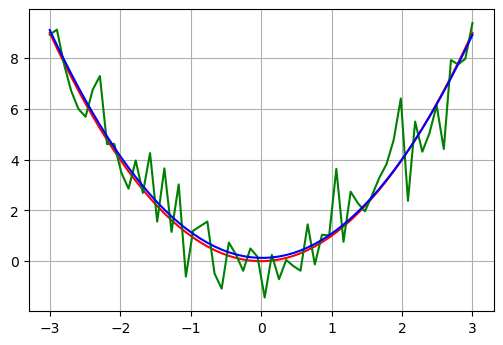

In [15]:
#przypomnienie z poprzednich zajęc
start = -3
stop = 3
step = 0.1
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmienej x
f = x**2 #wygenerowanie wartosci funkjci f
f_noise = f + np.random.normal(0, 1, size=x.shape) #funkcja z szumem

X = np.array( #zdefiniowanie modelu (wielomian 2 stopnia)
    [x**2, x**1, x**0]).T

model = np.linalg.inv(X.T @ X) @ X.T @ f_noise #obliczenie parametrow modelu interpolacja metoda najmniejszych kwadratow
print("Model: ", model)

print(model.shape) #kształt parametrow modelu
print(X.shape) #ksztalt modelu X

new_f = model @ X.T #wygenerowanie nowych wartosci funkcji f z szumu

plt.figure(dpi=100) #przedstawiewnie wykresów
plt.plot(x, f, "r-") #wykres wartosci funkjci f
plt.plot(x, f_noise, "g-") #wykres funkcji f z szumem
plt.plot(x, new_f, "b-") #wykres dopasowanych wartosci z szumem do modelu
plt.grid(True)
plt.show()

#metody optymalizacji dzielimy na gradientowe i niegradientowe, na zajeciach mamy tylko gradientowe
#optymalizacja dyskretna - szukanie sciezki w grafie

MSE GD:  0.03292945377296966
MSE Direct:  0.03615684834576967


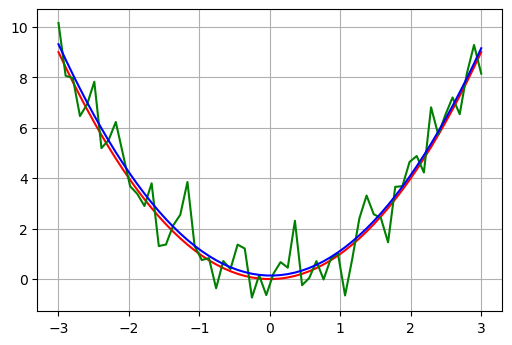

In [22]:
#optymalizacja - metoda spadku gradientu prostego
start = -3
stop = 3
step = 0.1
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmienej x
f = x**2 #wygenerowanie wartosci funkjci f
f_noise = f + np.random.normal(0, 1, size=x.shape) #funkcja z szumem

X = np.array( #zdefiniowanie modelu (wielomian 2 stopnia)
    [x**2, x**1, x**0]).T

mse = lambda a, b: np.mean((a-b)**2) #funkcja do liczenia błedu średnio-kwadratowego

#funkcja do optymalizacja metoda spadku gradientu
def gradient_descent(X, y, model, model_evaluator, jacobian_calculator, num_iters, learning_rate): 
    #minimalizowanie błędu, y' = model * X 
    """
    mean((y' -y)**2) -> min 
    mean((model * X - y)**2) -> min
    mean((model * X - y) * X) = 0   #algorytm szukania ekstremum
    """
    for i in range(num_iters): #petla do obliczania modelu
        model = model - learning_rate * jacobian_calculator(model, X, y) #nowa wartośc modelu
        current_values = model_evaluator(model, X) #wartosci kolejnych modeli
        current_error = mse(current_values, y) #blkad dla kolejnego modelu
        #print("Iteration: ", i, "Error: ", current_error, "Model: ", model)
    return model #zwrocenie modelu funkcji

model_evaluator = lambda model, X: X @ model #funkcja do liczenia nowych wartosci z wykorzystaniem modelu

def jacobian_calculator(model, X, y): #funkcja do obliczania jakobianu
    temp = model_evaluator(model, X) - y #obliczenie wartosci tymczasowej (model * X - y)
    result = np.mean(X.T * temp, axis=1) #obliczenie średniej wzdluz osi 1
    return result #zwrocenie jakobianu

#parametry do funkcji spadku gradientu
initial_model = np.random.randn(3) 
num_iters = 100
learning_rate = 0.1

#obliczenie nowego modelu
model = gradient_descent(X, f_noise, initial_model, model_evaluator, jacobian_calculator, num_iters, learning_rate)
new_f = model_evaluator(model, X) #obliczenie wartosci z nowego modelu

model_direct = np.linalg.inv(X.T @ X) @ X.T @ f_noise 
new_f_direct = model_evaluator(model_direct, X) #wartosci dla model_direct

print("MSE GD: ", mse(new_f, f))
print("MSE Direct: ", mse(new_f_direct, f))
 
plt.figure(dpi=100) #przedstawienie wykresów
plt.plot(x, f, "r-") #wykres funkcji f
plt.plot(x, f_noise, "g-") #wykres funkcji f z szumem
plt.plot(x, new_f, "b-") #wykres wartosci funkcji f z szumem dopaswanych do modelu
plt.grid(True)
plt.show()

#ze wzrostem iteracji maleje blad modelu
#blad gd jest inny od direct, bo mamy zadana liczbe iteracji w gd

#ta metoda jest malo idealna, ale dobra na poczatek
#metoda gradientu prostego nie jest wykorzystywana w praktyce, ale wszystkie stosowane metody sa koncepcyjnie jak ona

In [12]:
#ZADANIE 1
#Napisz funkcję implementującą metodę najszybszego spadku. Funkcja powinna mieć interfejs analogiczny do
#zaimplementowanej na zajęciach funkcji gradientu prostego, jednak bez definiowania określonego "learning rate". 
#Zaproponuj jak automatycznie zakończyć działanie funkcji gdy ekstremum zostanie osiągnięte. Metodę przetestuj na 
#przykładzie optymalizacji parametrów modelu wykorzystywanego w metodzie najmniejszych kwadratów

start = -3
stop = 3
step = 0.1
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples)
f = x**2
f_noise = f + np.random.normal(0, 1, size=x.shape)

X = np.array(
    [x**2, x**1, x**0]).T

def steepest_descent(X, y, model, model_evaluator, jacobian_calculator, max_iters):
    """
    mean((y' -y)**2) -> min
    mean((model * X - y)**2) -> min
    mean((model * X - y) * X) = 0
    """
    #num_iters jest to liczba iteracji przy ktorej dojdziemy do ekstremum
    #learning_rate wyznaczamy metoda optymalizacji jednowymiarowej
    
    
    for i in range(num_iters):
        model = model - learning_rate * jacobian_calculator(model, X, y)
        current_values = model_evaluator(model, X)
        current_error = mse(current_values, y)
        print("Iteration: ", i, "Error: ", current_error, "Model: ", model)
    return model


Iteration:  0 Current x:  -2.5735169491525425
Iteration:  1 Current x:  -2.5729301899571633
Iteration:  2 Current x:  -2.5729100776463545
Iteration:  3 Current x:  -2.5729093950337587
Iteration:  4 Current x:  -2.572909371873744
Iteration:  5 Current x:  -2.572909371087969
Iteration:  6 Current x:  -2.572909371061309
Iteration:  7 Current x:  -2.5729093710604043
Iteration:  8 Current x:  -2.5729093710603737
Iteration:  9 Current x:  -2.5729093710603728
X0: None


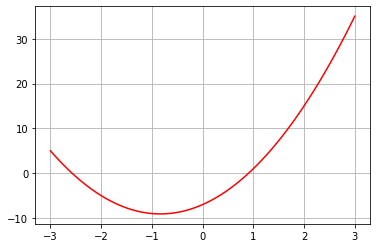

In [20]:
#metoda Newtona do wyznaczania miejsca zerowego
start = -3
stop = 3
step = 0.1
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
f = 3*x**2 + 5*x - 7 #wygenerowanie wartosci funkcji f

#metoda newtona jest nieparametryczna, nie potrzebuje learning_rate, ewentulanie liczba iteracji
def newton_method(f, xs, x0, num_iters): #zdefiniowanie funkcji do liczenia miejsca zerowego
    x = x0 #wartosc poczzatkowa x
    df = np.gradient(f, step) #obliczenie gradiedntu funkcji f
    for i in range(num_iters): #petla do szukania miejsca zerowego
        fx = np.interp(x, xs, f) #wartosc funkcji f w punkcie x
        dfx = np.interp(x, xs, df) #pochodna funkcji f w punkcie x
        x = x - fx / dfx #wartość miejsca zerowego
        print("Iteration: ", i, "Current x: ", x)

x0 = newton_method(f, x, -2.5, 10) #obliczenie miesjca zerowego funkjci
print("X0:", x0)

plt.figure()
plt.plot(x, f, "r-") #wykres funkcji f
plt.grid(True)
plt.show()

#w metodzie newtona musimy móc policzyc hessian (druga pochodna) funkcji

MSE Newton:  0.06725409041261692
MSE Direct:  0.0636235509347804


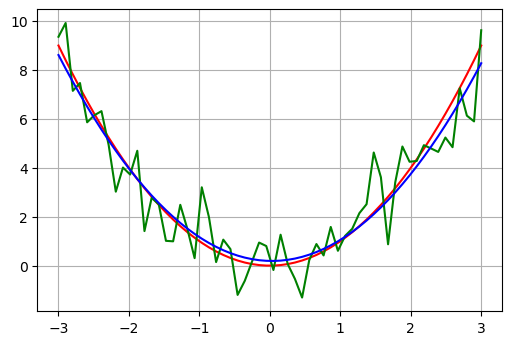

In [27]:
#optymalizacja - metoda newtona
start = -3
stop = 3
step = 0.1
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmienej x
f = x**2 #wygenerowanie wartosci funkjci f
f_noise = f + np.random.normal(0, 1, size=x.shape) #funkcja z szumem

X = np.array( #zdefiniowanie modelu (wielomian 2 stopnia)
    [x**2, x**1, x**0]).T

mse = lambda a, b: np.mean((a-b)**2) #funkcja do liczenia błedu średnio-kwadratowego

#funkcja do optymalizacji metoda newtona
def newton_method(X, y, model, model_evaluator, num_iters):
    #minimalizowanie błędu, y' = model * X 
    """
    mean((y' -y)**2) -> min 
    mean((model * X - y)**2) -> min
    mean((model * X - y) * X) = 0   #algorytm szukania ekstremum
    mean(X^2)
    """
    for i in range(num_iters): #petla do obliczania modelu
        evaluated_model = model_evaluator(model, X) #ewaluowany model
        df = np.mean(X.T * (evaluated_model - y), axis=1) # 
        ddf = np.mean(X*X, axis=0) 
        model = model - df/ddf #wartość nowa modelu

        current_values = model_evaluator(model, X) #wartosci kolejnych modeli
        current_error = mse(current_values, y) #blkad dla kolejnego modelu
        #print("Iteration: ", i, "Error: ", current_error, "Model: ", model)
    return model #zwrocenie modelu funkcji

model_evaluator = lambda model, X: X @ model

initial_model = np.random.randn(3)
num_iters = 20
model = newton_method(X, f_noise, initial_model, model_evaluator, num_iters) #obliczenie modelu
new_f = model_evaluator(model, X)

model_direct = np.linalg.inv(X.T @ X) @ X.T @ f_noise
new_f_direct = model_evaluator(model_direct, X) #wartosci dla model_direct

print("MSE Newton: ", mse(new_f, f)) #blad metody newtona
print("MSE Direct: ", mse(new_f_direct, f)) #blad direct

plt.figure(dpi=100) #przedstawienie wykresów
plt.plot(x, f, "r-") #wykres funkcji f
plt.plot(x, f_noise, "g-") #wykres funkcji f z szumem
plt.plot(x, new_f, "b-") #wykres wartosci funkcji f z szumem dopaswanych do modelu
plt.grid(True)
plt.show()

In [ ]:
# ZADANIE 2
#Na podstawie implementacji metody Newtona, dokonaj implementacji metody Gaussa-Newtona. Jakie są zalety 
#metody Gaussa-Newtona względem metody Newtona? Jakie wady? Przetestuj zaimplementowaną funkcję na przykładzie 
#problemu najmniejszych kwadratów.



Elapsed time optimize:  2.7464959621429443
Model:     direc: array([[-0.0050659 ,  0.02613858, -0.03181422, -0.1411488 ,  0.17751117],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.03015112,  0.06941973, -0.18475792, -0.37486778, -0.00168479],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.03973997, -0.02721585, -0.33733962,  0.14696609,  0.42089229]])
     fun: 0.9993355574279594
 message: 'Optimization terminated successfully.'
    nfev: 494
     nit: 8
  status: 0
 success: True
       x: array([ 9.99845383e-01,  2.52558723e-04,  1.31202871e-03, -1.02397027e-03,
       -3.27815350e-03]) 

Elapsed time optimize:  0.8954899311065674
Model:       fun: 0.9993355567988405
     jac: array([1.58332215e-04, 2.96888450e-04, 2.23676681e-05, 4.64305413e-05,
       3.44659537e-06])
 message: 'Optimization terminated successfully.'
    nfev: 11
    nhev: 0
     nit: 8
    njev: 62
  status: 0
 success: True
       x: ar

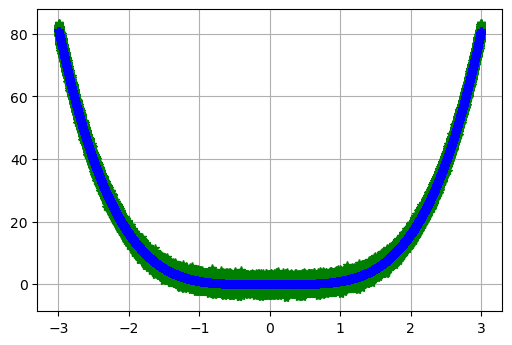

In [16]:
import scipy.optimize as optimize
import time

#gotowe funkcje do optymalizacji

start = -3
stop = 3
step = 0.00001
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerownie zakresu zmiennej x
f = x**4 #zdefiniowanie funkjci f
f_noise = f + np.random.normal(0, 1, size=x.shape) #wartosci funkjci f z szumem ormalnym

X = np.array( #zdefiniowanie modelu (wielomian 4 stopnia) 
    [x**4, x**3, x**2, x**1, x**0]).T

model_evaluator = lambda model, X: X @ model #funkcja do ewaluacji modelu

mse = lambda a, b: np.mean((a-b)**2) #funkcja do liczenia bledy srednio-kwadratowergo

def cost_function(model): #zdefiniowanie funkcji kosztu, jeden argument
    return np.mean((X @ model - f_noise)**2) #(X @ model) to nasze nowe wartosci funkjci f_noise

def jacobian_calculator(model): #funkcja do liczenia jakobianu 
    "mean((model * X - y)**2)"
    "mean((model * X - y) * X) = 0"
    return np.mean(X.T * (model_evaluator(model, X) - f_noise), axis=1)

initial_model = np.random.randn(5) #zdefiniowanie poczatkowego modelu

#obliczenie czasu na wykonanie optymaliacji wbudowana funkcja
b_t = time.time()
#metoda niegradientowa
model = optimize.minimize(cost_function, initial_model, method='Powell') #obliczenie modelu z funkcji wbudowanej

#metoda gradientowa (z liczeniem numerycznym gradientu)
# model = optimize.minimize(cost_function, initial_model, method='Newton-CG') #obliczenie modelu z funkcji wbudowanej
# model = optimize.minimize(cost_function, initial_model, jac=jacobian_calculator, method='L-BFGS-B') #najczesciej 
#wykorzystywana

e_t = time.time()
print("Elapsed time optimize: ", e_t - b_t)
print('Model: ', model, "\n")
model = model.x

b_t = time.time()
#metoda gradientowa z obliczonym jakobianem analitycznie, zwieksza to predkosc proceu
model = optimize.minimize(cost_function, initial_model, jac=jacobian_calculator, method='Newton-CG')
e_t = time.time()
print("Elapsed time optimize: ", e_t-b_t)
print('Model: ', model, "\n")
model = model.x

new_f = model_evaluator(model, X) #nowe wartosci na modelu z wbudowanej funkcji

b_t = time.time()
model_direct = np.linalg.inv(X.T @ X) @ X.T @ f_noise
e_t = time.time()
print("Elapsed time LS: ", e_t - b_t, "\n")

new_f_direct = model_evaluator(model_direct, X) #nowe wartosci na modelu z metody najmniejszych kwadratow

print("MSE optimize: ", mse(new_f, f)) #blad z funkcji wbudowanej
print("MSE LS: ", mse(new_f_direct, f)) #Blad metody najmniejszych kwadratow


plt.figure(dpi=100) #przedstawienie wykresów
plt.plot(x, f, "r*") #wykres funkcji f
plt.plot(x, f_noise, "g*") #wykres funcji f z szumem
plt.plot(x, new_f, "b*") #wykres wartosci funkcji f z szumem dopasowanych do modelu
plt.grid(True)
plt.show()

#korzystajac z wbudowanej funkcji mozna optymalizowac dowolne funkcje,
#zastosowanie - 
#czas jest dluzszy dla metody Powella, ale dla Newtona CG jest krotki, Najszybsza jest nasza mateoda najmnijeszych
#kwadrtow, poniewaz ona wykouje malo pracy
#liczba wywolan funkcji gradinentowej jest znacznie mnejsza, a jeszcze mniejsza z jakobianem liczonym analitycznie

#scipy jako biblioteka nie ma wspmagan do obliczen rownoleglych

Elapsed time PyTorch:  0.10160040855407715
Final model:  tensor([ 1.0013e+00, -1.6801e-04, -1.5672e-02,  5.8728e-03,  3.8824e-02],
       requires_grad=True)
Elapsed time LS:  0.0
MSE PyTorch:  0.0005398501680771979
MSE LS:  0.0005398304801925


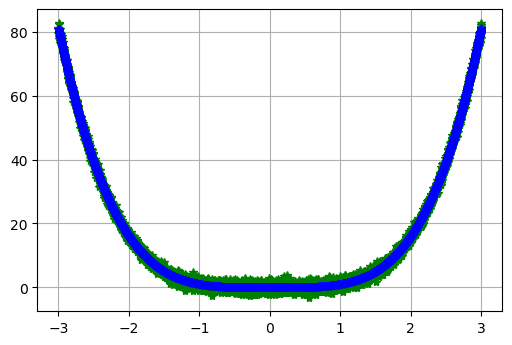

In [18]:
import torch
import torch.nn.functional as F
import torch.optim as optim

device = "cpu"

start = -3
stop = 3
step = 0.001
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerownie zakresu zmiennej x
f = x**4 #zdefiniowanie funkjci f
f_noise = f + np.random.normal(0, 1, size=x.shape) #wartosci funkjci f z szumem ormalnym

X = np.array( #zdefiniowanie modelu (wielomian 4 stopnia) 
    [x**4, x**3, x**2, x**1, x**0]).T

num_iters = 500
learning_rate = 0.1
initial_model = np.random.randn(5)

f_tensor = torch.Tensor(f_noise).to(device)
X_tensor = torch.Tensor(X).to(device)
params = torch.Tensor(initial_model).to(device)
params.requires_grad = True

def cost_function(y_prime, y):
    return torch.mean((y_prime - y)**2)

optimizer = optim.Adam([params], lr=learning_rate)

b_t = time.time()
for i in range(num_iters):
    current_values = torch.matmul(X_tensor, params)
    error = cost_function(current_values, f_tensor)
    error.backward()
    optimizer.step()
    optimizer.zero_grad()
    # if not i % 100:
    #     print("Iteration: ", i, "Error: ", error.item(), "Model: ", params)
e_t = time.time()
print("Elapsed time PyTorch: ", e_t-b_t)

print("Final model: ", params)


model = params.detach().cpu().numpy()
new_f = model_evaluator(model, X)

b_t = time.time()
model_direct = np.linalg.inv(X.T @ X) @ X.T @ f_noise
e_t = time.time()
print("Elapsed time LS: ", e_t-b_t)

new_f_direct = model_evaluator(model_direct, X)

print("MSE PyTorch: ", mse(new_f, f))
print("MSE LS: ", mse(new_f_direct, f))

plt.figure(dpi=100) #przedstawienie wykresów
plt.plot(x, f, "r*") #wykres funkcji f
plt.plot(x, f_noise, "g*") #wykres funcji f z szumem
plt.plot(x, new_f, "b*") #wykres wartosci funkcji f z szumem dopasowanych do modelu
plt.grid(True)
plt.show()


In [ ]:
#ZADANIE 3
#Zaimplementuj funkcję do liczenia Jacobianu dowolnej funkcji względem dowolnej zmiennej. Interfejs powinien 
#być następujący:
